## Geomagnetic storm magnitude plots and txt files

Makes txt, png and html files for recent Dst and Nc (Newell coupling)

Issues:



In [39]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
from numba import njit
import importlib
import copy
import locale

#Plotly imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px


#import geosphere colors

import colors as c


#import heliocats files
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

###

outputdir='results/icme_rate/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)

os.system('jupyter nbconvert --to script geomagnetic_storms.ipynb')    

system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geomagnetic_storms.ipynb to script
[NbConvertApp] Writing 29880 bytes to geomagnetic_storms.py


0

### get Dst data

In [27]:
##get omni dst data
get_new_data=0

fileomni="omni_1963_now.p"
if get_new_data: hd.save_omni_data(data_path,fileomni)
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

print(data_path+fileomni)

start=datetime.datetime.utcnow() - datetime.timedelta(days=2*365)
end=datetime.datetime.utcnow() 
#hp.plot_insitu_update(o, start, end,'OMNI2',outputdir,now=True)


#get current dst last 35 days
filenoaa='noaa_dst_last_35files_now.p'
n=pickle.load(open(data_path+filenoaa, "rb" ) )  

#store the original dst values
norig=copy.deepcopy(n)


#get current dst last 300 days
#filenoaa='noaa_dst_last_300files_now.p'
#n2=pickle.load(open(data_path+filenoaa, "rb" ) )  

############### TO DO stitch together n and n2





############ take only last year in the omni data
os=o.dst[-24*365:]
ot=o.time[-24*365:]

#search for the latest data point of omni in noaa dst, and cutoff the noaa dst
cutoff=np.where(np.isfinite(os)==False)[0][0]
print(ot[cutoff])
cutoffnoaa=np.where(n.time > ot[cutoff])[0][0]
print(cutoffnoaa)
#cut noaa dst array
n=n[cutoffnoaa:]

#print(norig.time)


/Users/chris/python/data/insitu_python/omni_1963_now.p
2024-08-22 19:00:00
2140


### plot Dst

77.0 -422.0


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3185113277.py:49: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



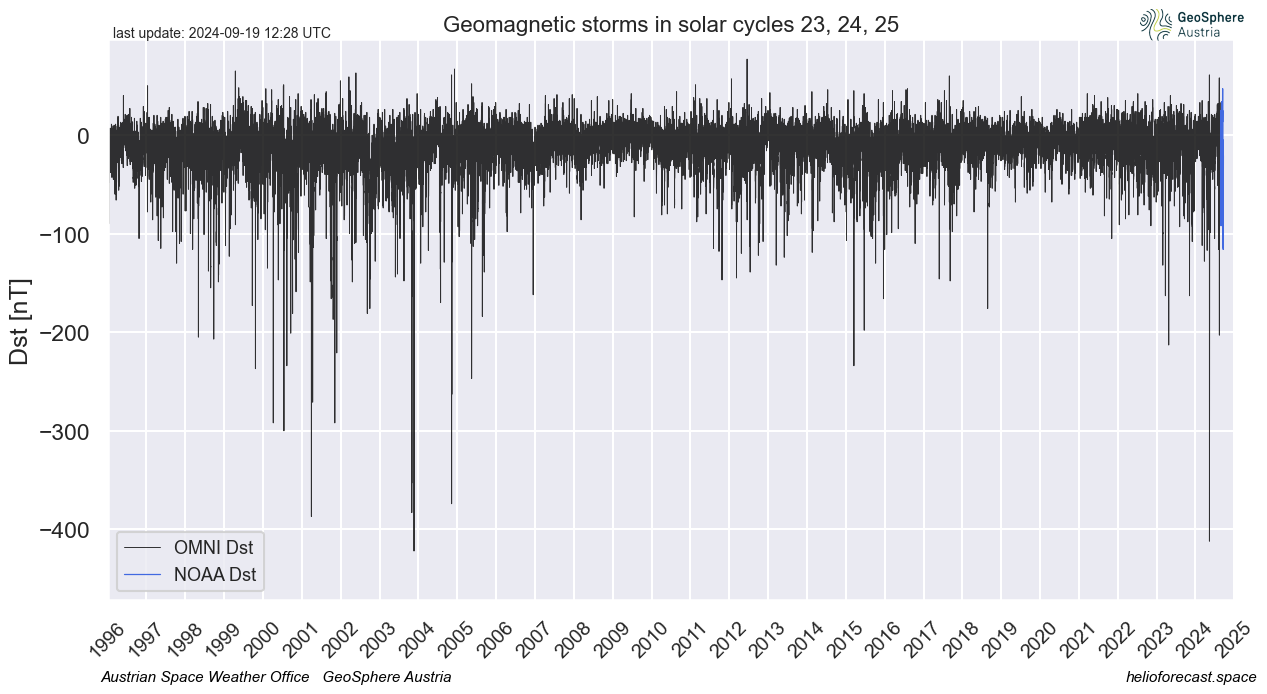

In [28]:
years=np.arange(1995,2040) 
yearly_start_times=[datetime.datetime(year,1,1) for year in years]

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')
#stack both OMNI and NOAA Dst and determine min max for last 27 years
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24*27:-1] )
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24*27:-1] )
print(plotmax, plotmin)
ax1.set_ylim(plotmin-50,plotmax+20)

ax1.set_xlim(start,end)

plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(yearly_start_times, fontsize=14,rotation=45) 

ax1.set_xlim(datetime.datetime(1996,1,1),datetime.datetime(datetime.datetime.utcnow().year+1,1,1))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Geomagnetic storms in solar cycles 23, 24, 25',fontsize=16)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')

plt.figtext(0.10,0.93,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

#ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.5, linewidth=1.0)


logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.89,0.89,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')

plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_all.png',dpi=100)

81.0 -589.0


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3340387277.py:58: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



saved as results/icme_rate/geomagnetic_storm_space_age.png


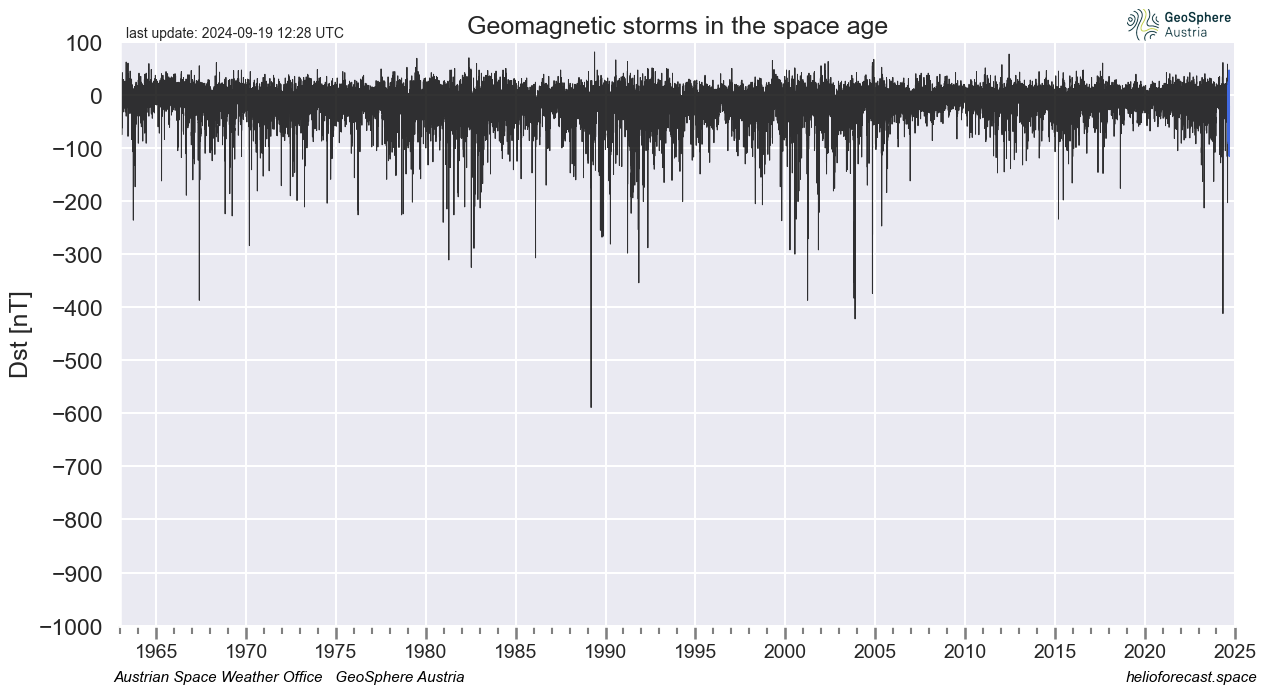

In [29]:
years=np.arange(1955,2040,5) 
yearly_start_times=[datetime.datetime(year,1,1) for year in years]

sns.set_context('talk')
sns.set_style('darkgrid')
#sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')
#stack both OMNI and NOAA Dst and determine min max space age
plotmin=np.nanmin(np.hstack([o.dst,n.dst]) )
plotmax=np.nanmax(np.hstack([o.dst,n.dst]) )
print(plotmax, plotmin)

ax1.set_xlim(start,end)

plt.ylabel('Dst [nT]')
ax1.set_yticks(np.arange(-1500,200,100))
ax1.set_ylim(-1000,plotmax+20)

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(yearly_start_times, fontsize=14,rotation=0) 
ax1.xaxis.set_minor_locator(mdates.YearLocator())
ax1.tick_params(which='both', bottom=True, color='gray')


ax1.set_xlim(datetime.datetime(1963,1,1),datetime.datetime(datetime.datetime.utcnow().year+1,1,1))

#ax1.axvline(datetime.datetime.utcnow(), color='r', linestyle='--',linewidth=0.8,alpha=0.3)


#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Geomagnetic storms in the space age',fontsize=18)

fsize=12
#plt.legend(loc=3,fontsize=13)
plt.figtext(0.10,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')

plt.figtext(0.11,0.93,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

#ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.5, linewidth=1.0)

logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.88,0.89,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')

    


plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_all_space_age.png',dpi=100)

print('saved as', outputdir+'geomagnetic_storm_space_age.png')

61.0 -412.0


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3449841683.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



saved as results/icme_rate/geomagnetic_storm_latest.png


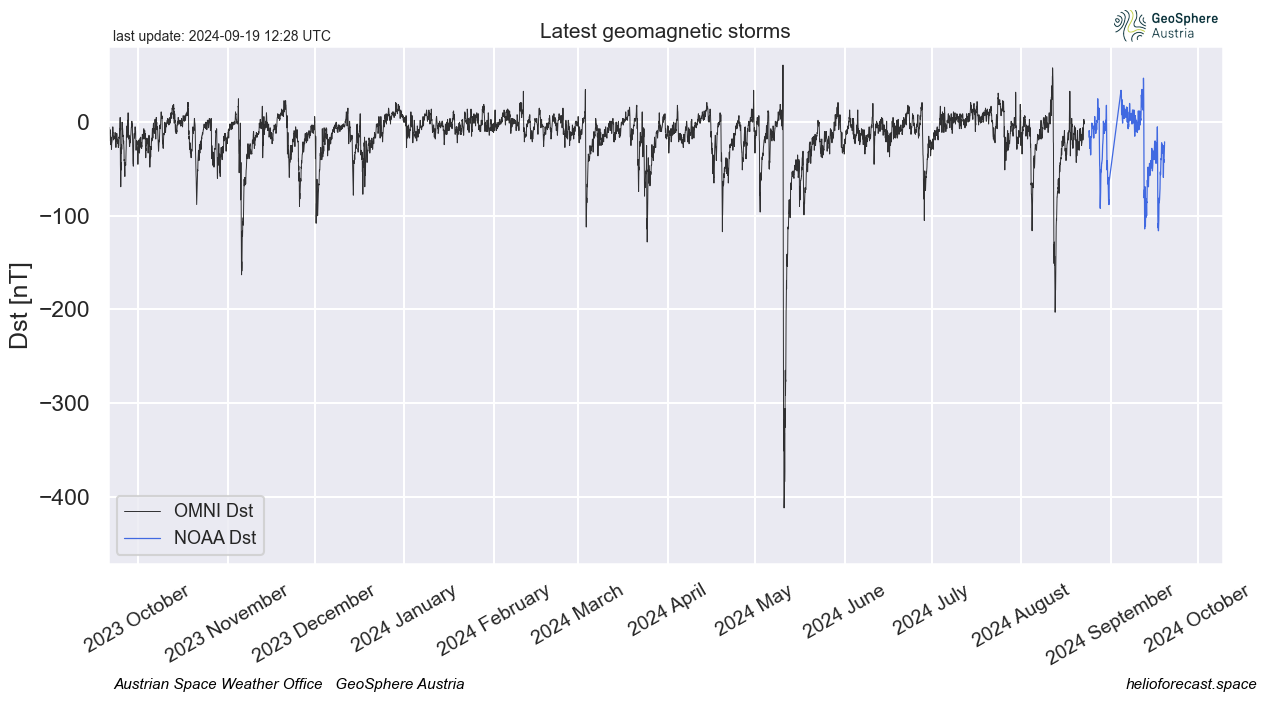

In [30]:
years=np.arange(1995,2040) 
months=np.arange(1,13)
monthly_start_times=[datetime.datetime(year,month,1) for year in years for month in months]


locale.setlocale(locale.LC_ALL,'en_US')

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)



ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#search for last data point in omni data in last 2 years, the problem is that omni has nan for the whole year
os2=o.dst[-24*365*2:]
#search for the latest data point of omni
cutoff_2=np.where(np.isfinite(os2)==False)[0][0]

plotmin=np.nanmin(np.hstack([os2[0:cutoff_2],n.dst])[-365*24:-1])
plotmax=np.nanmax(np.hstack([os2[0:cutoff_2],n.dst])[-365*24:-1])
print(plotmax, plotmin)

ax1.set_xlim(start,end)
ax1.set_ylim(plotmin-60,plotmax+20)
plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(monthly_start_times, fontsize=14,rotation=30) 


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=365),datetime.datetime.utcnow()+datetime.timedelta(days=20))

#ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=10),datetime.datetime.utcnow()+datetime.timedelta(days=10))

#ax1.axvline(datetime.datetime.utcnow(), color='r', linestyle='--',linewidth=0.8,alpha=0.3)

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Latest geomagnetic storms',fontsize=15)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.10,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')
plt.figtext(0.10,0.935,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.87,0.90,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')

#ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.5, linewidth=1.0)



plt.tight_layout()




plt.savefig(outputdir+'geomagnetic_storm_latest.png',dpi=100)


print('saved as', outputdir+'geomagnetic_storm_latest.png')
##histogram

In [31]:
nrows=1
fig = make_subplots(rows=nrows, cols=1, shared_xaxes=True)

fig.add_trace(go.Scatter(x=n.time, y=n.dst, name='NOAA Dst', mode='markers',marker=dict(color='black', size=10)) )
fig.add_trace(go.Scatter(x=n.time, y=n.dst, name='NOAA Dst',line_color='blue') )
fig.add_trace(go.Scatter(x=o.time, y=o.dst, name='OMNI Dst',line_color='black') )

fig.update_layout(title='Dst index', font=dict(size=20))

fig.update_layout(xaxis=dict(range=[datetime.datetime.utcnow()-datetime.timedelta(days=365*25),datetime.datetime.utcnow()+datetime.timedelta(days=3)]) )


fig.update_layout(
    xaxis=dict(
        title=dict(
            text="time",
            font=dict(size=20)  # Adjust the font size as needed
        )
    ),
    yaxis=dict(
        title=dict(
            text="Dst [nT]",
            font=dict(size=20)  # Adjust the font size as needed
        )
    )
)
              
fig.write_html(outputdir+'geomagnetic_storm_latest.html')
print('saved',outputdir+'geomagnetic_storm_latest.html')

saved results/icme_rate/geomagnetic_storm_latest.html


61.0 -412.0


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3600834507.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



saved as results/icme_rate/geomagnetische_stuerme_letztes_Jahr.png


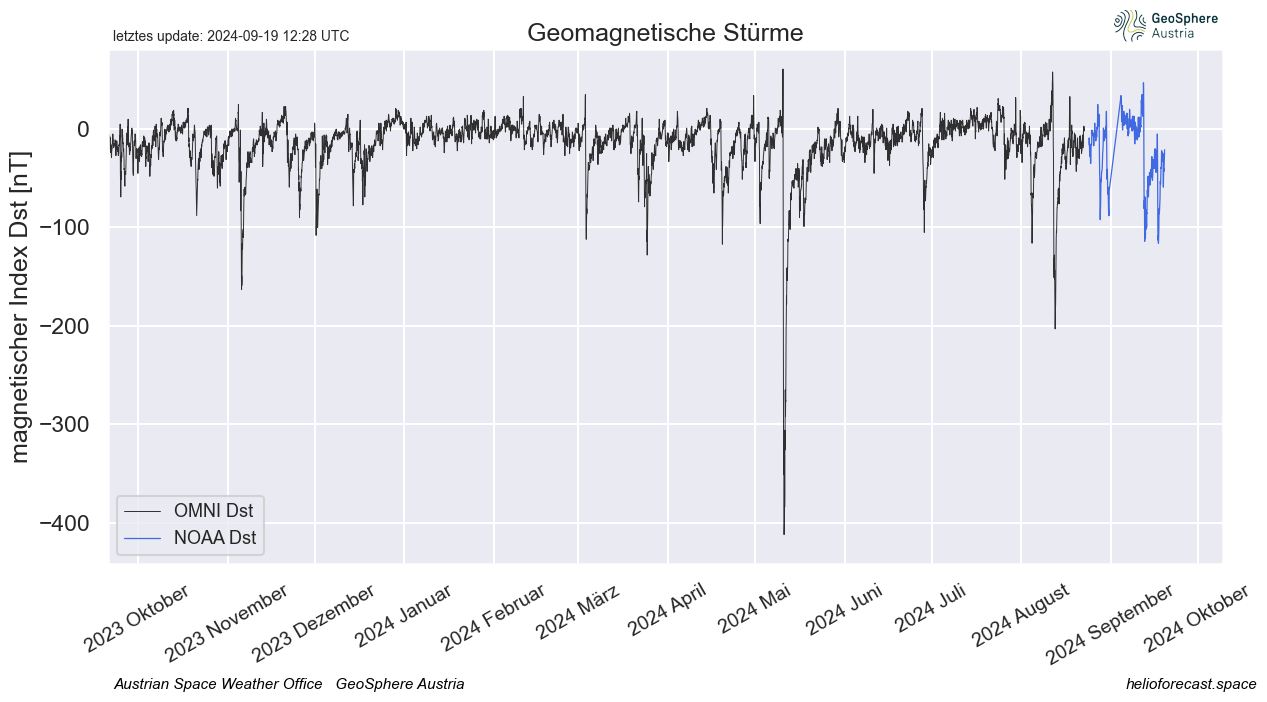

In [32]:
###same in german

locale.setlocale(locale.LC_ALL,'de_DE')

years=np.arange(1995,2040) 
months=np.arange(1,13)
monthly_start_times=[datetime.datetime(year,month,1) for year in years for month in months]


sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#search for last data point in omni data in last 2 years, the problem is that omni has nan for the whole year
os2=o.dst[-24*365*2:]
#search for the latest data point of omni
cutoff_2=np.where(np.isfinite(os2)==False)[0][0]

plotmin=np.nanmin(np.hstack([os2[0:cutoff_2],n.dst])[-365*24:-1])
plotmax=np.nanmax(np.hstack([os2[0:cutoff_2],n.dst])[-365*24:-1])
print(plotmax, plotmin)

ax1.set_xlim(start,end)
ax1.set_ylim(plotmin-30,plotmax+20)
plt.ylabel('magnetischer Index Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(monthly_start_times, fontsize=14,rotation=30) 


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=365),datetime.datetime.utcnow()+datetime.timedelta(days=20))

#ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=10),datetime.datetime.utcnow()+datetime.timedelta(days=10))

#ax1.axvline(datetime.datetime.utcnow(), color='r', linestyle='--',linewidth=0.8,alpha=0.3)

plt.title('Geomagnetische Stürme')
#plt.title('Latest geomagnetic storms',fontsize=15)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.10,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')
plt.figtext(0.10,0.935,'letztes update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.87,0.90,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')

#ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.5, linewidth=1.0)



plt.tight_layout()




plt.savefig(outputdir+'geomagnetische_stuerme_letztes_Jahr.png',dpi=100)


print('saved as', outputdir+'geomagnetische_stuerme_letztes_Jahr.png')
##histogram

## Dst plot with thresholds

92.0 -462.0
saved results/icme_rate/geomagnetic_storm_latest_zoom.png


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/1874112563.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



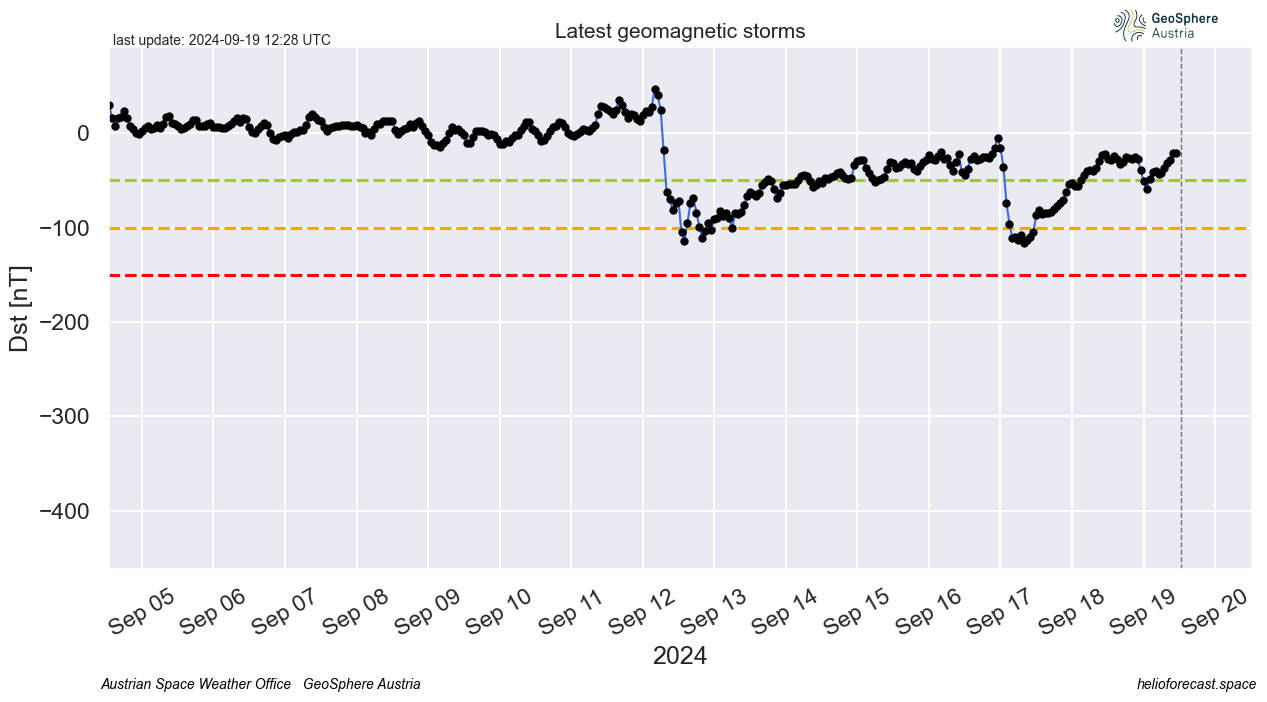

In [33]:
#get current dst last 35 days
filenoaa='noaa_dst_last_35files_now.p'
n=pickle.load(open(data_path+filenoaa, "rb" ) )  

locale.setlocale(locale.LC_ALL,'en_US')

#########################

threshold1=-50 #for real time application
threshold2=-100 
threshold3=-150 

###################

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.axhline(y=threshold1, color='yellowgreen', linestyle='--',label='threshold 1')
ax1.axhline(y=threshold2, color='orange', linestyle='--',label='threshold 2')
ax1.axhline(y=threshold3, color='red', linestyle='--',label='')

ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.5, linewidth=1.0)

ax1.plot(n.time,n.dst,color='royalblue',linewidth=1.5,alpha=1.0)
ax1.plot(n.time,n.dst,'ok',markersize=5)

plotmin=np.nanmin(n.dst)-50
plotmax=np.nanmax(n.dst)+30

#always show the threshold at -150
if plotmin > -170: plotmin=-170
print(plotmax, plotmin)

ax1.set_ylim(plotmin,plotmax)
plt.ylabel('Dst [nT]')
ax1.xaxis_date()
ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=15),datetime.datetime.utcnow()+datetime.timedelta(days=1))

plt.title('Latest geomagnetic storms',fontsize=15)
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.DayLocator())
myformat = mdates.DateFormatter('%b %d')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(rotation=30)

ax1.set_xlabel(datetime.datetime.utcnow().year)

fsize=12

logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.87,0.90,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')


plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-2, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-2, style='italic')
plt.figtext(0.10,0.93,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)
plt.tight_layout()


#plt.savefig('alerts/alert_dst.png',dpi=100)

plt.savefig(outputdir+'geomagnetic_storm_latest_zoom.png',dpi=100)
print('saved',outputdir+'geomagnetic_storm_latest_zoom.png')

### plotly

In [34]:
nrows=1
fig = make_subplots(rows=nrows, cols=1, shared_xaxes=True)


fig.add_trace(go.Scatter(x=n.time, y=n.dst, name='Dst', mode='markers',marker=dict(color='black', size=10)) )
fig.add_trace(go.Scatter(x=n.time, y=n.dst, name='Dst',line_color='blue') )

fig.update_layout(title='Dst index', font=dict(size=20))

fig.update_layout(xaxis=dict(range=[datetime.datetime.utcnow()-datetime.timedelta(days=15),datetime.datetime.utcnow()+datetime.timedelta(days=2)]) )


fig.update_layout(
    xaxis=dict(
        title=dict(
            text="time",
            font=dict(size=20)  # Adjust the font size as needed
        )
    ),
    yaxis=dict(
        title=dict(
            text="Dst [nT]",
            font=dict(size=20)  # Adjust the font size as needed
        )
    )
)
              
fig.write_html(outputdir+'geomagnetic_storm_latest_zoom.html')
print('saved',outputdir+'geomagnetic_storm_latest_zoom.html')

saved results/icme_rate/geomagnetic_storm_latest_zoom.html


## Newell Coupling

 
calculate Newell coupling without propagation first
 


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/2407489960.py:121: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



saved as results/icme_rate/newell_coupling_latest.png


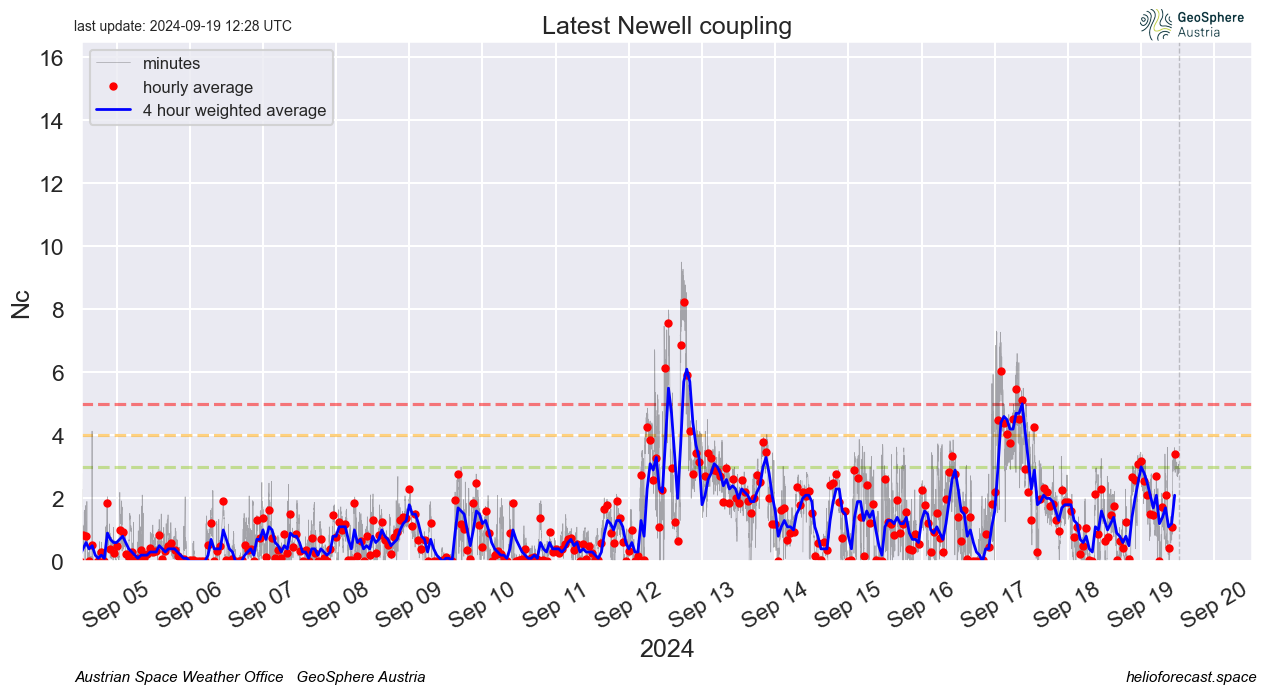

In [35]:
###add plot and add to txt file without propagation 

#get NOAA solar wind


locale.setlocale(locale.LC_ALL,'en_US')

filenoaa='noaa_rtsw_last_35files_now.p'
[w,h]=pickle.load(open(data_path+filenoaa, "rb" ) )  

    
@njit
def calc_coupling_newell(by, bz, v):
    #Empirical Formula for dFlux/dt - the Newell coupling
    #e.g. paragraph 25 in Newell et al. 2010 doi:10.1029/2009JA014805
    #input: needs arrays for by, bz, v    
    
    bt = np.sqrt(by**2 + bz**2)
    bztemp = bz
    bztemp[bz == 0] = 0.001
    tc = np.arctan2(by,bztemp)     #calculate clock angle (theta_c = t_c)
    neg_tc = bt*np.cos(tc)*bz < 0  #similar to IDL code sol_coup.pro
    tc[neg_tc] = tc[neg_tc] + np.pi
    sintc = np.abs(np.sin(tc/2.))
    nc = (v**1.33333)*(sintc**2.66667)*(bt**0.66667)
    
    return nc


def nc_weights(nc):    

    #this function is for 1 hour time resolution
    nc_weight=np.zeros(len(nc))

    prev_hour_weight = 0.65    # reduce weighting by factor with each hour back
    
    weights=np.zeros(4)

    weights[3] = 1  #the current fraction of hour is weighted as linear
    weights[2] = prev_hour_weight  
    weights[1] = prev_hour_weight**2  
    weights[0] = prev_hour_weight**3      
    
    for i in np.arange(4,len(nc)):
        #add and normalize
        nc_weight[i] = np.round(np.nansum(nc[i-3:i+1]*weights)/ np.nansum(weights),1)    
    
    return nc_weight

print(' ')
print('calculate Newell coupling without propagation first')
print(' ')
#n-> dst
#w-> solar wind



#minute resolution
w_nc=calc_coupling_newell(w.by,w.bz,w.vt)/4421
#interpolate to 1 hour first
n_nci=np.interp(mdates.date2num(norig.time),mdates.date2num(w.time),w_nc)
#then do weighting
n_ncw=nc_weights(n_nci)

#print(n_ncw)

#check if this process is how its done for ovation



sns.set_context('talk')
sns.set_style('darkgrid')

fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)


ax1.axhline(y=3, color='yellowgreen', linestyle='--',alpha=0.5)
ax1.axhline(y=4, color='orange', linestyle='--',alpha=0.5)
ax1.axhline(y=5, color='red', linestyle='--',alpha=0.5)

ax1.axvline(x=datetime.datetime.utcnow(), color='k', linestyle='--',alpha=0.2, linewidth=1.0)


ax1.plot(w.time,w_nc,'-k',linewidth=0.5,alpha=0.3, label='minutes')
ax1.plot(norig.time,n_nci,'or',linewidth=0.5,markersize=5, label='hourly average')
ax1.plot(norig.time,n_ncw,'-b',linewidth=2,label='4 hour weighted average')


plt.figtext(0.07,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')
plt.figtext(0.07,0.94,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

plt.ylabel('Nc')
plt.legend(loc=2,fontsize=12)
plt.title('Latest Newell coupling')
ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=15),datetime.datetime.utcnow()+datetime.timedelta(days=1))


#minimum 6.5 for y axis
if np.nanmax(n_ncw) < 7.0:
    ax1.set_ylim(0,7.0)
else:
    ax1.set_ylim(0,np.nanmax(n_ncw)+2)


ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.DayLocator())
myformat = mdates.DateFormatter('%b %d')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(rotation=30)

ax1.set_xlabel(datetime.datetime.utcnow().year)

logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.89,0.89,0.08,0.08], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')



plt.tight_layout()

plt.savefig(outputdir+'newell_coupling_latest.png',dpi=100)

print('saved as', outputdir+'newell_coupling_latest.png')



### plotly

In [36]:
#plot the last 30 days

days_going_back=30
startind=np.where(norig.time > datetime.datetime.utcnow()-datetime.timedelta(days=days_going_back))[0][0]  
norig=norig[startind:]    
n_ncw=n_ncw[startind:]

nrows=1
fig = make_subplots(rows=nrows, cols=1, shared_xaxes=True)

#fig.add_trace(go.Scatter(x=norig.time, y=n_nci, name='Nc hourly', mode='markers',marker=dict(color='red', size=10)) )
fig.add_trace(go.Scatter(x=norig.time, y=n_ncw, name='4h weighted average',mode='markers',marker=dict(color='black', size=8)) )
fig.add_trace(go.Scatter(x=norig.time, y=n_ncw, name='4h weighted average',line_color='blue') )



fig.update_layout(title='Newell coupling', font=dict(size=20))
fig.update_layout(xaxis=dict(range=[datetime.datetime.utcnow()-datetime.timedelta(days=10),datetime.datetime.utcnow()+datetime.timedelta(days=1)]) )


fig.update_layout(
    xaxis=dict(
        title=dict(
            text="time",
            font=dict(size=20)  # Adjust the font size as needed
        )
    ),
    yaxis=dict(
        title=dict(
            text="Nc",
            font=dict(size=20)  # Adjust the font size as needed
        )
    )
)
              
        
fig.write_html(f''+outputdir+'/newell_coupling_latest.html')
print('saved as', outputdir+'newell_coupling_latest.html')



saved as results/icme_rate/newell_coupling_latest.html


## Quick overview plot for top of dashboard

with geosphere colors


In [37]:
#make cutouts for better plotting

#L1 RTSW 

cutoff_time=datetime.datetime.utcnow()-datetime.timedelta(days=0.75)

w_cut=w[np.where(w.time > cutoff_time)[0]]
# Dst
n_cut=n[np.where(n.time > cutoff_time)[0]]
# Nc
#4 hour res
n_ncw_cut=n_ncw[np.where(norig.time > cutoff_time)[0]]
n_ncw_cut_time=norig.time[np.where(norig.time > cutoff_time)[0]]

#high res
w_nc_cut=w_nc[np.where(w.time > cutoff_time)[0]]
w_nc_cut_time=w.time[np.where(w.time > cutoff_time)[0]]

/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3567862388.py:19: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3411/3567862388.py:83: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



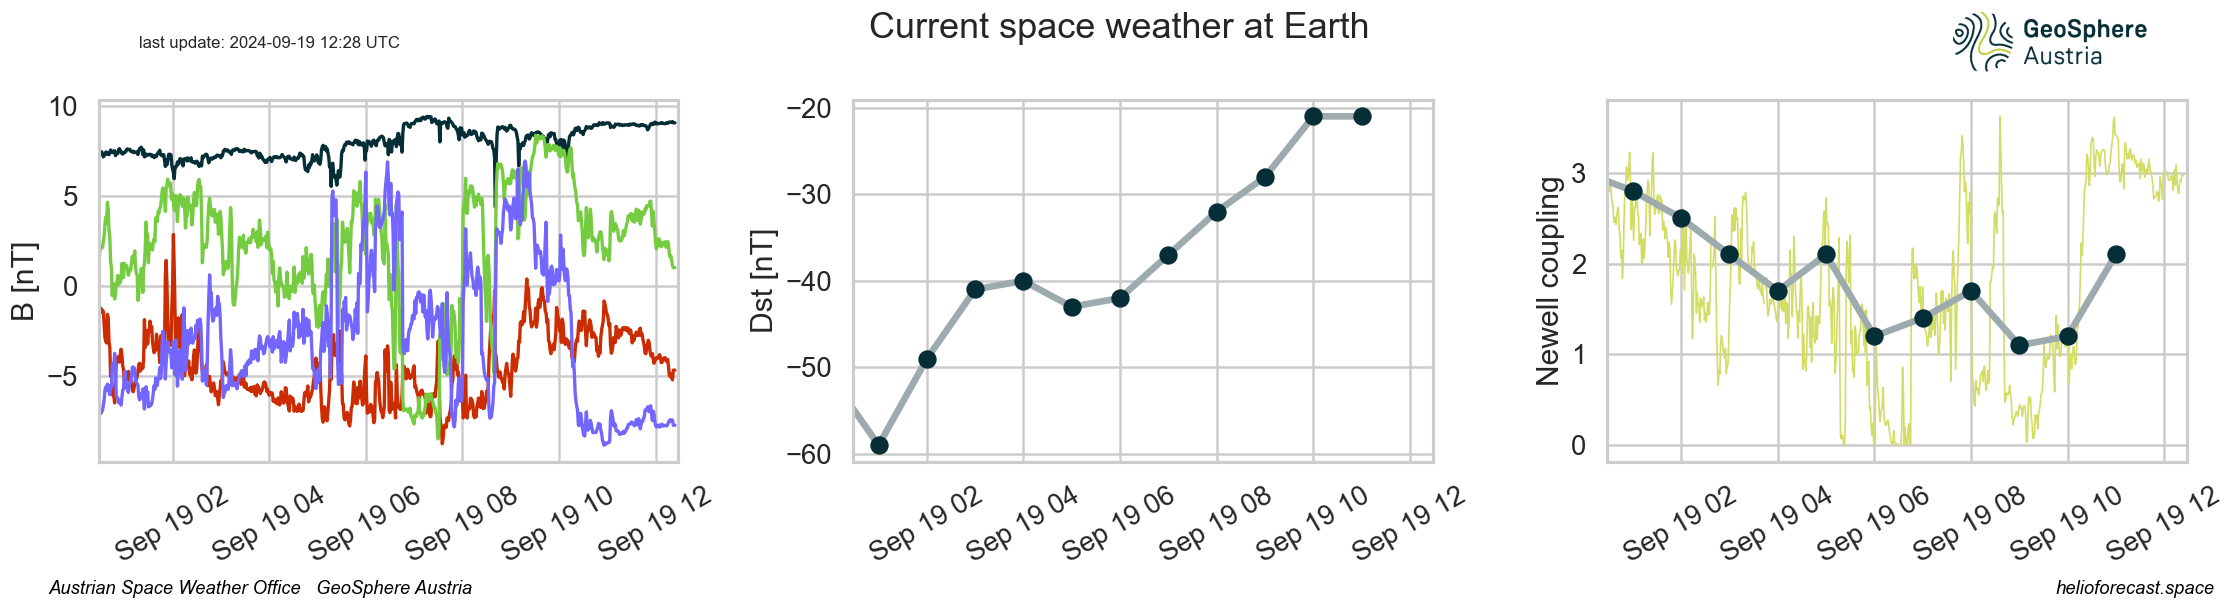

In [38]:
sns.set_context('talk')
sns.set_style('whitegrid')

fig,ax=plt.subplots(1,figsize=(19,5),dpi=120,edgecolor=c.geo_green)

    
#grid with  RGB (244/244/244) and 1px
    
    
#plt.title('Custom Font for Title', fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
#plt.xlabel('X-axis', fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'light'})
#plt.ylabel('Y-axis', fontdict={'family': 'monospace', 'size': 12, 'weight': 'normal'})
    
    

        

##########
ax1=plt.subplot(131)
ax1.plot(w_cut.time,w_cut.bt,linestyle='-',color=c.geo_green,lw=2)
ax1.plot(w_cut.time,w_cut.bx,linestyle='-',color=c.geo_red,lw=2)
ax1.plot(w_cut.time,w_cut.by,linestyle='-',color=c.geo_grassgreen,lw=2)
ax1.plot(w_cut.time,w_cut.bz,linestyle='-',color=c.geo_lavender,lw=2)
 
plt.ylabel('B [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%b %d %H')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(rotation=30)


#####################################
ax2=plt.subplot(132)

ax2.plot(n_cut.time,n_cut.dst,linestyle='-',color=c.geo_green3,lw=4)
ax2.plot(n_cut.time,n_cut.dst,color=c.geo_green, marker='o',linestyle='none',markersize=10)

plt.ylabel('Dst [nT]')
ax2.xaxis_date()
myformat = mdates.DateFormatter('%b %d %H')
ax2.xaxis.set_major_formatter(myformat)
plt.xticks(rotation=30)



##################################
ax3=plt.subplot(133)

ax3.plot(w_nc_cut_time,w_nc_cut,color=c.geo_lime2,linestyle='-',lw=1)
ax3.plot(n_ncw_cut_time,n_ncw_cut,color=c.geo_green3,lw=4)
ax3.plot(n_ncw_cut_time,n_ncw_cut,color=c.geo_green,marker='o',markersize=10,linestyle='none')

plt.ylabel('Newell coupling')

ax3.xaxis_date()
myformat = mdates.DateFormatter('%b %d %H')
ax3.xaxis.set_major_formatter(myformat)
plt.xticks(rotation=30)



#LOGO
logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
newax = fig.add_axes([0.85,0.88,0.1,0.1], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis('off')


plt.figtext(0.03,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=11, style='italic')
plt.figtext(0.07,0.92,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UTC', ha='left', fontsize=10)

#plt.figtext(0.03,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=11, style='italic')


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=0.5),datetime.datetime.utcnow())
ax2.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=0.5),datetime.datetime.utcnow())
ax3.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=0.5),datetime.datetime.utcnow())
        

plt.suptitle('Current space weather at Earth')
plt.tight_layout()


plt.savefig(outputdir+'geomagnetic_quick.png')

### save data for last few months as txt

In [14]:
## to do: indicate if data comes from OMNI or NOAA

dst=np.hstack([os[cutoff-24*180:cutoff],n.dst])
time=np.hstack([ot[cutoff-24*180:cutoff],n.time])
output_format='%Y-%m-%dT%H:%MZ'
time=[ts.strftime(output_format) for ts in time]

data=np.zeros(len(time),dtype=[('time','U17'),('dst', float)])   

#add Nc

#convert to recarray
data = data.view(np.recarray)  
data.time=time
data.dst=dst

#data.nc=nc

#flip so that latest data is on top

data=np.flip(data)

#save latest year as file
np.savetxt(outputdir+'geomagnetic_storm_latest.txt',data, delimiter=' ', fmt='%s %d', header='time [UTC]   Dst [nT] / data from OMNI2, NOAA. ASWO, GeoSphere Austria, created '+str(datetime.datetime.utcnow())[0:16]+' UTC')
print('saved as', outputdir+'geomagnetic_storm_latest.txt')

print(' ')
print('latest data point',data.time[-1])





saved as results/icme_rate/geomagnetic_storm_latest.txt
 
latest data point 2024-02-24T19:00Z


In [15]:
print(' ')
print(' ')
print('Dst update png and txt done ')

print('------------------------')



 
 
Dst update png and txt done 
------------------------


#### looking into the data

In [16]:
#https://plotly.com/python/


data_lookup=0


if data_lookup > 0:

    #init_notebook_mode(connected = True)
    init_notebook_mode(connected = False)

    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=o.time, y=o.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()

In [17]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=n.time, y=n.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()


In [18]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=data.time, y=data.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()


### Histograms

In [19]:
#years23=np.arange(1996,2009)
#years24=np.arange(2009,2020)
#years25=np.arange(2020,2023)

start20=datetime.datetime(1965,1,1)
start22=datetime.datetime(1986,1,1)
start23=datetime.datetime(1996,1,1)
start24=datetime.datetime(2009,1,1)
start25=datetime.datetime(2020,1,1)

rise20=datetime.datetime(1968,1,1)
rise22=datetime.datetime(1989,1,1)
rise23=datetime.datetime(1999,1,1)
rise24=datetime.datetime(2012,1,1)


#ind23=np.where(np.logical_and(o.time > start23,o.time < start24))[0]
#ind24=np.where(np.logical_and(o.time > start24,o.time < start25))[0]

ind20=np.where(np.logical_and(o.time > start20,o.time < rise20))[0]
ind22=np.where(np.logical_and(o.time > start22,o.time < rise22))[0]
ind23=np.where(np.logical_and(o.time > start23,o.time < rise23))[0]
ind24=np.where(np.logical_and(o.time > start24,o.time < rise24))[0]

ind25=np.where(o.time > start25)[0]

o20=o[ind20]
o22=o[ind22]
o23=o[ind23]
o24=o[ind24]
o25=o[ind25]


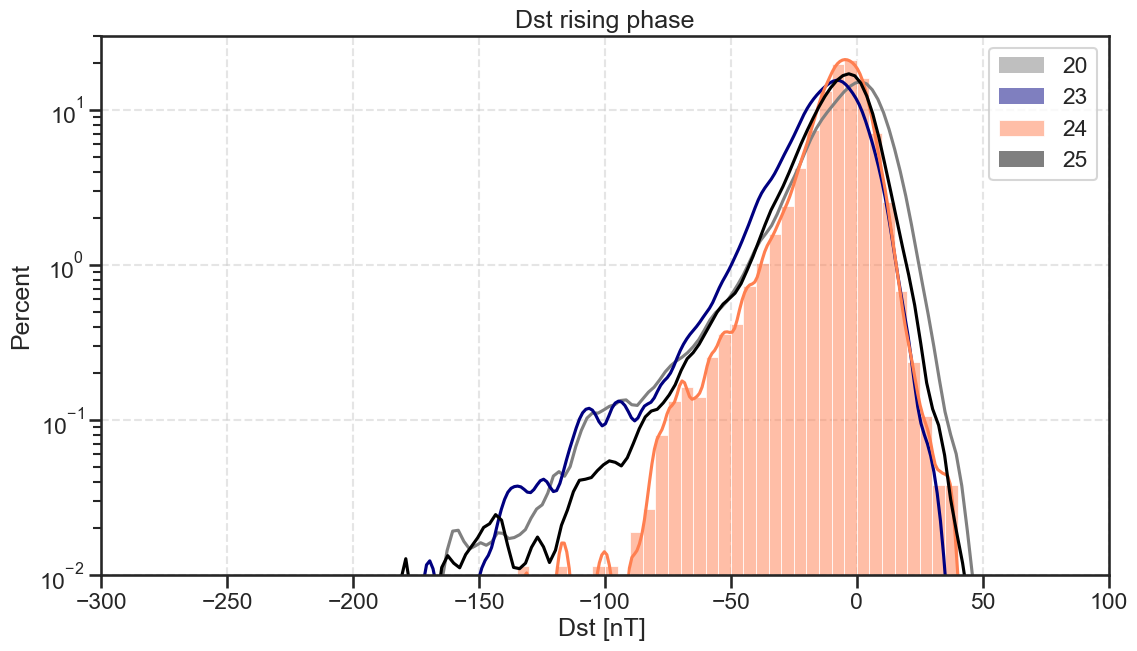

<Figure size 640x480 with 0 Axes>

In [20]:
#compare rising phases


# Create a histogram plot using seaborn
sns.set_context("talk")     
#sns.set_style('darkgrid')
#sns.set_style('whitegrid',{'grid.linestyle': '--'})

sns.set_style("ticks",{'grid.linestyle': '--'})
fig, ax=plt.subplots(1,figsize=(13,7),dpi=100)


bins=np.arange(-500,120,5)
#print(bins)


# Plot the histogram
sns.histplot(o20.dst, bins=bins, kde=True, color='grey', stat='percent',shrink=0,label='20')
#sns.histplot(o22.dst, bins=bins, kde=True, color='grey', stat='percent',shrink=0,label='22')
sns.histplot(o23.dst, bins=bins, kde=True, color='navy', stat='percent',shrink=0,label='23')
sns.histplot(o24.dst, bins=bins, kde=True, color='coral', stat='percent',label='24')
sns.histplot(o25.dst, bins=bins, kde=True, color='black', stat='percent',shrink=0,label='25')

#sns.kdeplot(o24, color='tomato')
#sns.kdeplot(data=data["total_bill"], fill=True)
#sns.kdeplot(o25, bins=bins, kde=True, color='yellow', stat='percent')

ax.grid(alpha=0.5)
ax.set_ylim(0.01, 30)
ax.set_xlim(-300, 100)
plt.yscale('log')
# Add labels and a title
plt.xlabel('Dst [nT] ')
plt.ylabel('Percent')
plt.title('Dst rising phase')
plt.legend()

# Show the plot
plt.show()


plt.figtext(0.03,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-4, style='italic')

plt.tight_layout()

#plotfile='geomagnetic_storm_dst_cycles.png'
#plt.savefig(outputdir+plotfile,dpi=100)
#plt.savefig(plotfile,dpi=100)
#print('saved as ',plotfile)

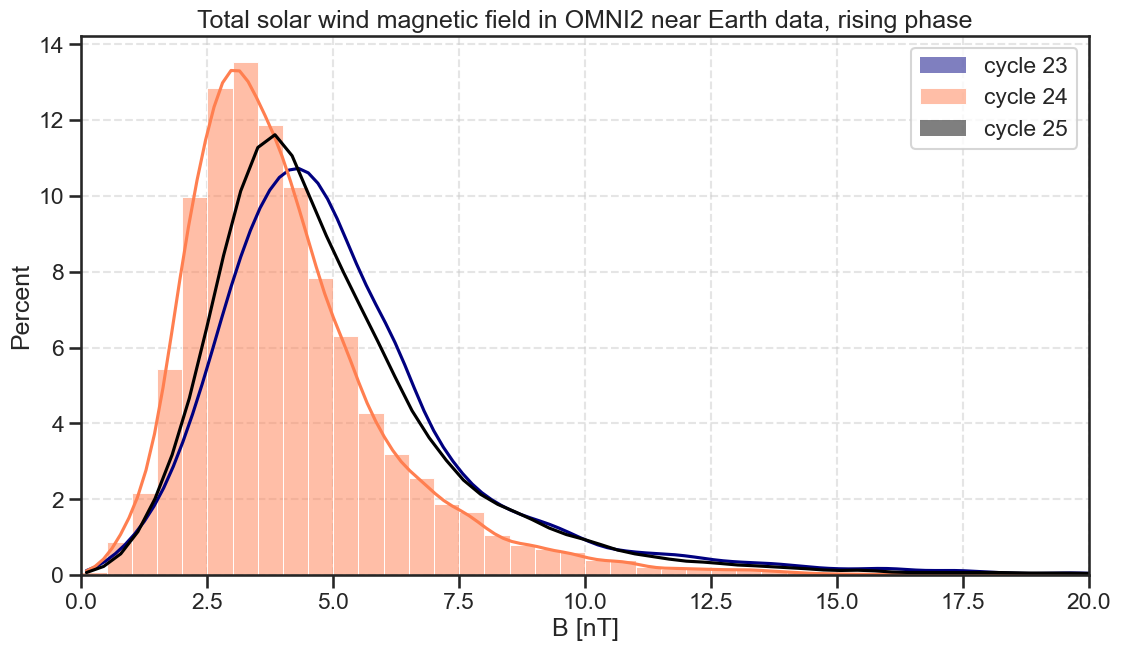

In [21]:
sns.set_style("ticks",{'grid.linestyle': '--'})
fig1, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.grid(alpha=0.5)

plt.xlabel('B [nT]')
plt.ylabel('Percent')
plt.title('Total solar wind magnetic field in OMNI2 near Earth data, rising phase')



bins=np.arange(0,50,0.5)
#sns.histplot(o20.bt, bins=bins, kde=True, color='grey', stat='percent',shrink=0,label='cycle 20')
sns.histplot(o23.bt, bins=bins, kde=True, color='navy', stat='percent',label='cycle 23',multiple="dodge",shrink=0)
sns.histplot(o24.bt, bins=bins, kde=True, color='coral', stat='percent',label='cycle 24',multiple="dodge")
sns.histplot(o25.bt, bins=bins, kde=True, color='black', stat='percent',label='cycle 25',multiple="dodge",shrink=0)

#data=[o23.bt,o24.bt,o25.bt]
#sns.histplot(data, bins=bins, kde=True, stat='percent',multiple="dodge",shrink=0, element="bars")

# Create a custom legend

ax1.set_xlim(0, 20)
plt.legend()

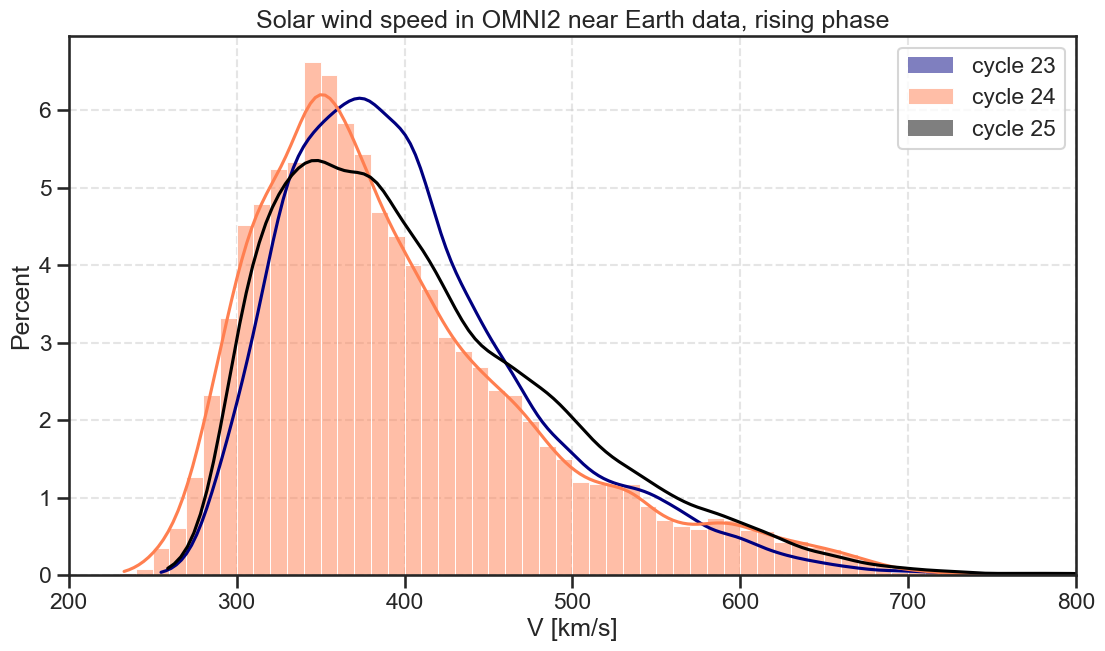

In [22]:
sns.set_style("ticks",{'grid.linestyle': '--'})
fig1, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.grid(alpha=0.5)

plt.xlabel('V [km/s]')
plt.ylabel('Percent')
plt.title('Solar wind speed in OMNI2 near Earth data, rising phase')


bins=np.arange(0,1000,10)
#sns.histplot(o20.vt, bins=bins, kde=True, color='grey', stat='percent',label='cycle 23',shrink=0)
sns.histplot(o23.vt, bins=bins, kde=True, color='navy', stat='percent',label='cycle 23',shrink=0)
sns.histplot(o24.vt, bins=bins, kde=True, color='coral', stat='percent',label='cycle 24')
sns.histplot(o25.vt, bins=bins, kde=True, color='black', stat='percent',label='cycle 25',shrink=0)

ax1.set_xlim(200, 800)
plt.legend()